In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

2023-11-16 01:02:20.268187: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 01:02:20.292389: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 01:02:20.754587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[BernoulliRBM] Iteration 1, pseudo-likelihood = -105.61, time = 8.60s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -94.63, time = 8.99s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -87.41, time = 9.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -84.36, time = 9.16s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -82.02, time = 9.09s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -78.52, time = 9.20s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -79.42, time = 10.35s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -78.31, time = 11.96s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -76.11, time = 11.49s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -77.32, time = 13.21s


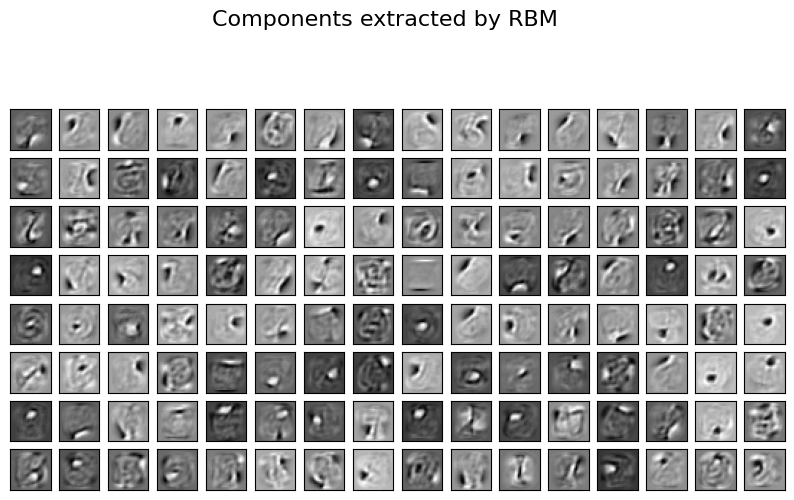

In [2]:
(X, _), (_, _) = mnist.load_data()
X = X.reshape(-1, 784) / 255.

rbm = BernoulliRBM(n_components=128, learning_rate=0.01, batch_size=10, n_iter=10, verbose=1)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm)])

rbm_features_classifier.fit(X)

plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(16, 16, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap='gray')
    plt.xticks(())
    plt.yticks(())

plt.suptitle('Components extracted by RBM', fontsize=16)
plt.show()